# Examen parcial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando data

## Encuesta nacional de hogares: Modulo de empleo

In [2]:
encuesta = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSYI2akOLcGmyHKqUFfTTItSdalfvjbc-6uJyGJsx1npEi4OglyKRTxPBK-kmGGEdg3rnHTYXPAhz7W/pub?gid=696114169&single=true&output=csv",dtype={'ubigeo':str,'mes':str,'aÑo':str})

## Tabla de ubigeos

In [3]:
ubigeos = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT_mmuShk3IFKLB4NUmDXpznO3l-Rn0HkABAsfVkB-k5Xh3cg9ldGe7tBHZxGbmRT2-rYgBhtqCSr_A/pub?gid=537851677&single=true&output=csv",dtype={'ubigeo':str})

## Cruce de datos

In [4]:
data = pd.merge(encuesta,ubigeos,how='left',on='ubigeo').query("ocu500 not in ['no pea','0']")

In [5]:
data.head()

,aÑo,mes,ubigeo,dominio,estrato,ocu500,ocupinf,p207,p208a,ingreso,formal,ocupado,Distrito,Provincia,Departamento
0,2020,01,010101,sierra norte,Urbano,ocupado,empleo formal,mujer,49,NaN,1,1,Chachapoyas,Chachapoyas,Amazonas
1,2020,01,010101,sierra norte,Urbano,ocupado,empleo informal,mujer,16,NaN,0,1,Chachapoyas,Chachapoyas,Amazonas
2,2020,01,010101,sierra norte,Urbano,ocupado,empleo informal,mujer,61,NaN,0,1,Chachapoyas,Chachapoyas,Amazonas
3,2020,01,010101,sierra norte,Urbano,ocupado,empleo informal,mujer,29,202.75,0,1,Chachapoyas,Chachapoyas,Amazonas
5,2020,01,010101,sierra norte,Urbano,ocupado,empleo informal,mujer,42,NaN,0,1,Chachapoyas,Chachapoyas,Amazonas


# Pregunta 1:  (7 puntos)





```
# Esto tiene formato de código
```

Calcula la edad media por provincia y emplea algun metodo para identificar y corregir los valores atipicos

Número de valores nulos en 'p208a': 0
Edad media por provincia:
 Provincia
Abancay          42.263323
Acobamba         42.158986
Acomayo          43.168254
Aija             44.339844
Alto Amazonas    40.029328
                   ...    
Yauli            43.094286
Yauyos           47.945255
Yungay           42.469240
Yunguyo          50.798643
Zarumilla        40.674505
Name: p208a, Length: 195, dtype: float64


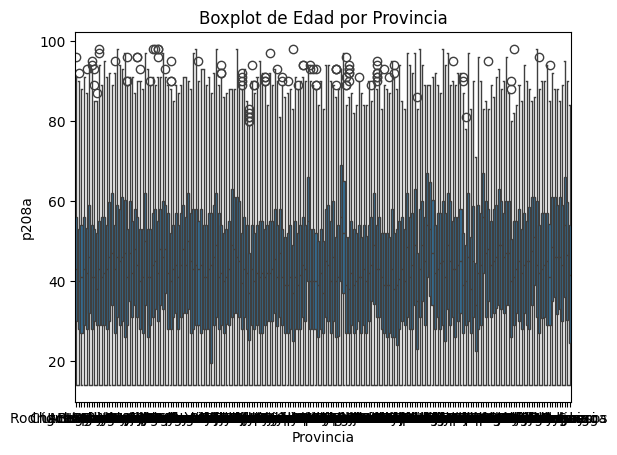

Número de valores atípicos eliminados: 54

Edad media por provincia después de eliminar atípicos:
 Provincia
Abancay          42.239695
Acobamba         42.158986
Acomayo          43.168254
Aija             44.339844
Alto Amazonas    40.029328
                   ...    
Yauli            43.094286
Yauyos           47.945255
Yungay           42.469240
Yunguyo          50.698413
Zarumilla        40.674505
Name: p208a, Length: 195, dtype: float64


In [10]:
# Convierte la columna 'p208a' a numérica, ignorando los errores
data['p208a'] = pd.to_numeric(data['p208a'], errors='coerce')

# Verifica si hay valores nulos después de la conversión
print("Número de valores nulos en 'p208a':", data['p208a'].isnull().sum())

# Calcula la edad media por provincia después de la conversión
edad_media_por_provincia = data.groupby('Provincia')['p208a'].mean()

# Imprime la edad media por provincia
print("Edad media por provincia:\n", edad_media_por_provincia)

# Identifica y visualiza los valores atípicos utilizando un boxplot
sns.boxplot(x='Provincia', y='p208a', data=data)
plt.title('Boxplot de Edad por Provincia')
plt.show()

# Calcula los límites para definir valores atípicos
Q1 = data['p208a'].quantile(0.25)
Q3 = data['p208a'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra valores atípicos
data_sin_atipicos = data[(data['p208a'] >= lower_bound) & (data['p208a'] <= upper_bound)]

# Imprime el número de valores atípicos eliminados
print("Número de valores atípicos eliminados:", len(data) - len(data_sin_atipicos))

# Calcula la nueva edad media por provincia después de eliminar valores atípicos
edad_media_sin_atipicos = data_sin_atipicos.groupby('Provincia')['p208a'].mean()
print("\nEdad media por provincia después de eliminar atípicos:\n", edad_media_sin_atipicos)


# Pregunta 2:  (7 puntos)

Considera las siguientes pautas

- Considerando solo a la poblacion ocupada
- Calcula el ingreso medio y la tasa de formalidad por provincia
- Emplea algun metodo de deteccion de valores atipicos para identificar al valor atipico multivariado

Ingreso medio por provincia:
 Provincia
Abancay          1544.775916
Acobamba          755.202731
Acomayo          1053.598272
Aija              994.454048
Alto Amazonas    1414.469670
                    ...     
Yauli            1437.956366
Yauyos            801.062957
Yungay            983.121606
Yunguyo           804.380745
Zarumilla        1155.037797
Name: ingreso, Length: 195, dtype: float64

Tasa de formalidad por provincia:
 Provincia
Abancay          0.210852
Acobamba         0.028884
Acomayo          0.051447
Aija             0.124000
Alto Amazonas    0.126899
                   ...   
Yauli            0.396341
Yauyos           0.059701
Yungay           0.060827
Yunguyo          0.023095
Zarumilla        0.123315
Name: formal, Length: 195, dtype: float64

Número de valores atípicos detectados: 112863.0


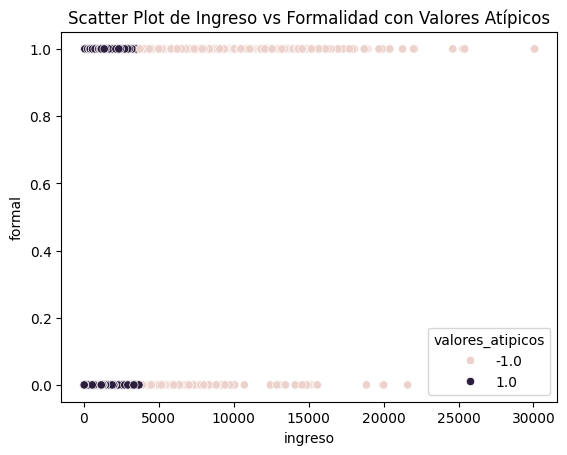

In [18]:
from sklearn.covariance import EllipticEnvelope

# Supongamos que tu conjunto de datos se llama 'data'
# Asegúrate de tener las columnas 'ingreso', 'formal', 'Provincia' y 'ocupado' en tu conjunto de datos

# Filtra solo a la población ocupada
poblacion_ocupada = data[data['ocupado'] == 1].copy()  # Agrega .copy() para evitar la advertencia

# Convierte la columna 'ingreso' a numérica, ignorando los errores
poblacion_ocupada['ingreso'] = pd.to_numeric(poblacion_ocupada['ingreso'], errors='coerce')

# Calcula el ingreso medio por provincia
ingreso_medio_por_provincia = poblacion_ocupada.groupby('Provincia')['ingreso'].mean()

# Imprime el ingreso medio por provincia
print("Ingreso medio por provincia:\n", ingreso_medio_por_provincia)

# Calcula la tasa de formalidad por provincia
tasa_formalidad_por_provincia = poblacion_ocupada.groupby('Provincia')['formal'].mean()

# Imprime la tasa de formalidad por provincia
print("\nTasa de formalidad por provincia:\n", tasa_formalidad_por_provincia)

# Selecciona las columnas relevantes para la detección de valores atípicos multivariados
columnas_atipicos = ['ingreso', 'formal']

# Filtra solo las filas relevantes y elimina valores nulos
datos_atipicos = poblacion_ocupada[columnas_atipicos].dropna()

# Utiliza Elliptic Envelope para la detección de valores atípicos multivariados
detector_atipicos = EllipticEnvelope(contamination=0.05)  # Puedes ajustar el parámetro de contaminación según sea necesario
detector_atipicos.fit(datos_atipicos)

# Predice los valores atípicos solo para los datos relevantes
valores_atipicos = detector_atipicos.predict(datos_atipicos)

# Añade la columna de valores atípicos solo para los datos relevantes al conjunto de datos original usando .loc
poblacion_ocupada.loc[datos_atipicos.index, 'valores_atipicos'] = valores_atipicos

# Imprime el número de valores atípicos detectados
print("\nNúmero de valores atípicos detectados:", poblacion_ocupada['valores_atipicos'].sum())

# Visualiza la distribución de ingreso y formalidad con un scatter plot
sns.scatterplot(x='ingreso', y='formal', hue='valores_atipicos', data=poblacion_ocupada)
plt.title('Scatter Plot de Ingreso vs Formalidad con Valores Atípicos')
plt.show()


# Pregunta 3:  (6 puntos)

Usa el dataframe `df` para analizar sus valores perdidos y aplica el proceso de imputacion de datos que consideres mas apropiado.

In [16]:
def generar_valores_perdidos(df, porcentaje=0.2):
    df_valores_perdidos = df.copy()
    total_valores_perdidos = int(len(df_valores_perdidos.values.flatten()) * porcentaje)
    posiciones_valores_perdidos = np.random.choice(df_valores_perdidos.size, total_valores_perdidos, replace=False)
    for posicion in posiciones_valores_perdidos:
        fila, columna = np.unravel_index(posicion, df_valores_perdidos.shape)
        df_valores_perdidos.iat[fila, columna] = np.nan
    return df_valores_perdidos

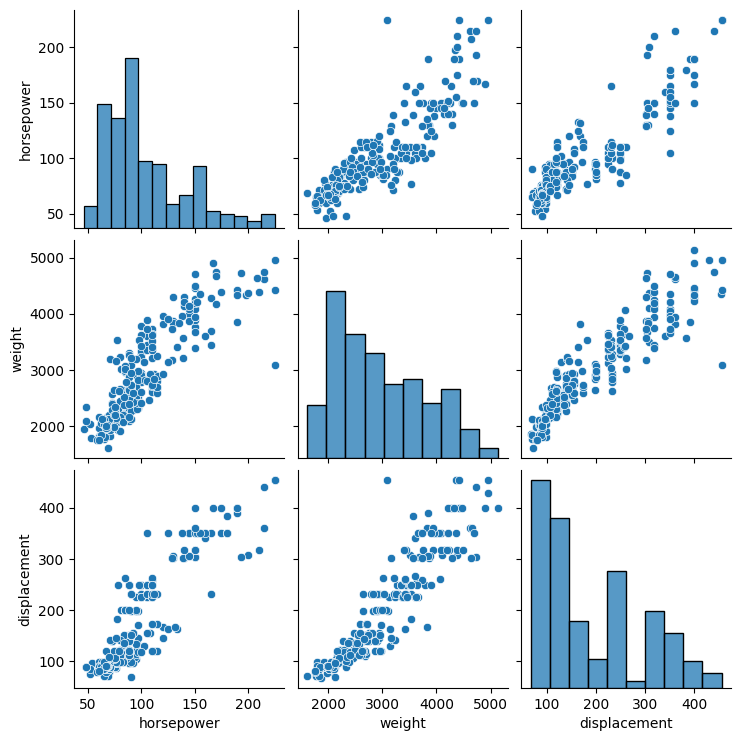

In [17]:
mtcars = sns.load_dataset('mpg')[['horsepower','weight','displacement']]
df = generar_valores_perdidos(mtcars, porcentaje=0.2)
sns.pairplot(df)

In [19]:
df.isna().sum()

horsepower      88
weight          78
displacement    76
dtype: int64

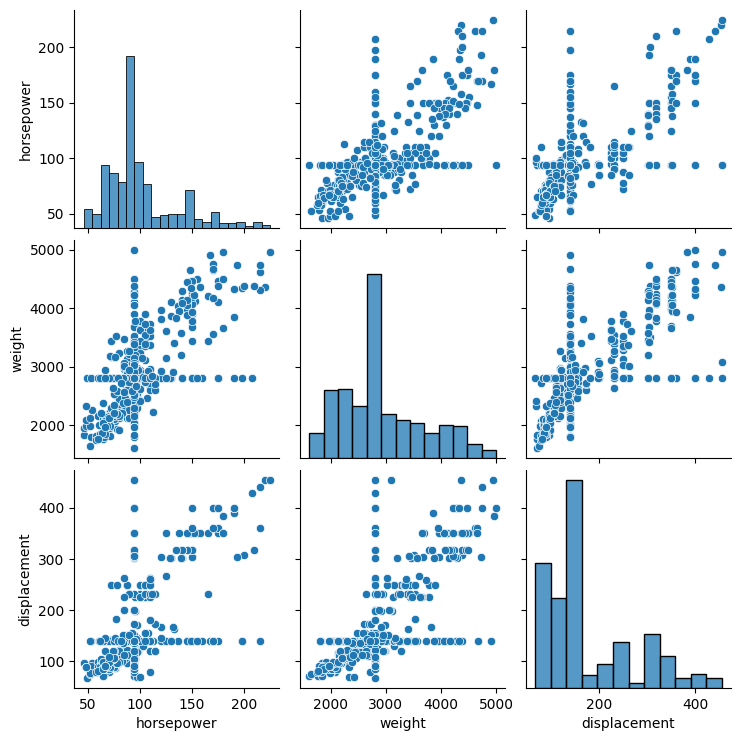

Cantidad de valores perdidos por columna después de la imputación:
 horsepower      0
weight          0
displacement    0
dtype: int64


In [22]:
from sklearn.impute import SimpleImputer

def generar_valores_perdidos(df, porcentaje=0.2):
    df_valores_perdidos = df.copy()
    total_valores_perdidos = int(len(df_valores_perdidos.values.flatten()) * porcentaje)
    posiciones_valores_perdidos = np.random.choice(df_valores_perdidos.size, total_valores_perdidos, replace=False)
    for posicion in posiciones_valores_perdidos:
        fila, columna = np.unravel_index(posicion, df_valores_perdidos.shape)
        df_valores_perdidos.iat[fila, columna] = np.nan
    return df_valores_perdidos

# Cargar el conjunto de datos mtcars
mtcars = sns.load_dataset('mpg')[['horsepower','weight','displacement']]

# Generar valores perdidos en el DataFrame
df = generar_valores_perdidos(mtcars, porcentaje=0.2)

# Imputar valores perdidos utilizando la mediana
imputer = SimpleImputer(strategy='median')
df_imputado = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Visualizar un par de gráficos utilizando sns.pairplot
sns.pairplot(df_imputado)
plt.show()

# Contar la cantidad de valores perdidos en cada columna después de la imputación
valores_perdidos_despues_imputacion = df_imputado.isna().sum()
print("Cantidad de valores perdidos por columna después de la imputación:\n", valores_perdidos_despues_imputacion)
